<a href="https://colab.research.google.com/github/sahilfaizal01/Bark_Texture_Image_Classification/blob/main/(UPDATED)Final_Submission_SAHIL_FAIZAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Required Libraries**


In [ ]:
!pip install Augmentor #Installing Augmentor Library - for image augmentation to maintain class imbalance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libraries**

In [ ]:
import glob #Importing glob library -> for file access purpose
import cv2 #Importing OpenCV library -> for image processing purpose
import os #Importing os library -> for file access purpose
import numpy as np #Importing Numpy library -> for data pre-processing purpose
from tensorflow import keras #Importing Keras library -> for data pre-processing purpose
from sklearn.model_selection import train_test_split #Importing train_test_split library -> to split the dataset
import matplotlib.pyplot as plt #Importing Matplotlib library -> for visualisation purpose
#import Augmentor #Importing the already downloaded Augmentor library

# **Exploring the Dataset**

In [ ]:
directory = "/content/drive/MyDrive/BarkVN-50_mendeley" #the Google drive dataset folder(directory) where data is saved
dir_list = os.listdir(directory) #this will contain the directories within the dataset folder

In [ ]:
# Finding the count of images in each class
class_cnt = [] #initialising class_cnt list
classes = [] #initialising classes list
for dir in dir_list: #looping through each directory
  images = glob.glob(directory + '/' + dir + '/*.JPG') #making a list of all
  cnt = 0
  classes.append(dir)
  print(dir)
  for img in images:
    image = cv2.imread(img)
    cnt += 1
  print(cnt)
  class_cnt.append(cnt)

Wrightia religiosa
110
Wrightia
110
Melaleuca
110
Prunus salicina
110
Spondias mombin L
110
Cocos nucifera
220
Pterocarpus macrocarpus
110
Melia azedarach
110
Dalbergia oliveri
110
Prunnus
110
Khaya senegalensis
110
Acacia
110
Tectona grandis
110
Gmelina arborea Roxb
110
Annona squamosa
110
Cananga odorata
110
Artocarpus heterophyllus
138
Musa
132
Hopea
110
Eucalyptus
127
Barringtonia acutangula
110
Mangifera
110
Ficus racemosa
117
Persea
110
Ficus microcarpa
150
Artocarpus altilis
110
Polyalthia longifolia
110
Carica papaya
207
Anacardium occidentale
239
Psidium guajava
122
Citrus aurantiifolia
110
Magnolia alba
110
Cedrus
110
Adenium species
144
Adenanthera microsperma
110
Chrysophyllum cainino
111
Lagerstroemia speciosa
110
Terminalia catappa
113
Dipterocarpus alatus
158
Khaya senegalensis A.Juss
110
Casuarina equisetifolia
110
Tamarindus indica
110
Citrus grandis
110
Erythrina fusca
110
Senna siamea
110
Delonix regia
110
Syzygium nervosum
110
Veitchia merrilli
152
Nephelium lappace

In [ ]:
np.median(class_cnt)

103.0

In [ ]:
np.mean(class_cnt)

111.76

# **Note:-**

### Since the median and mean values of individual class count of different classes are around 110. I decided to do *upsampling* to generate more samples of those classes having less images(minority classes) so that they can reach the limit of 110. And *downsampling* to take only 110 images even if the particular class contains more images(majority classes). This way I was more or less able to preserve the dataset balance without lossing much data.

# **Data Augmentation - to Handle Class Imbalance**


In [ ]:
for dir in dir_list:
  images = glob.glob(directory + '/' + dir + '/*')
  cnt = 0     #loading the images from directories
  for img in images:
    image = cv2.imread(img)
    cnt += 1                 
  # performing data augmentation for upsampling using Augmentor package  
  p = Augmentor.Pipeline(directory + '/' + dir + '/')
  # these are some operations which are gonna be performed on images to generate new data
  p.zoom(probability=0.3,min_factor=0.8,max_factor=1.5) # zoom operation to be performed with a probability of 30%
  p.flip_top_bottom(probability=0.4) # flip top bottom operation to be performed with a probability of 30%
  p.random_brightness(probability=0.3,min_factor=0.3,max_factor=1.2) # random brightness operation to be performed with a probability of 30%
  p.random_distortion(probability=1,grid_width=4,grid_height=4,magnitude=8) # random distortion operation to be performed with a probability of 30%
  p.sample(110-cnt) # generating only samples for the minority classes till 110

Initialised with 100 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Wrightia religiosa/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C2E5D0>: 100%|██████████| 10/10 [00:00<00:00, 63.25 Samples/s]


Initialised with 97 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Wrightia/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C4F350>: 100%|██████████| 13/13 [00:00<00:00, 69.68 Samples/s]


Initialised with 107 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Melaleuca/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE513B10>: 100%|██████████| 3/3 [00:00<00:00, 65.53 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Prunus salicina/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C3CCD0>: 100%|██████████| 5/5 [00:00<00:00, 57.19 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Spondias mombin L/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE513590>: 100%|██████████| 8/8 [00:00<00:00, 75.38 Samples/s]


Initialised with 110 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Cocos nucifera/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C0DD10>: 100%|██████████| 110/110 [00:01<00:00, 76.12 Samples/s] 


Initialised with 100 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Pterocarpus macrocarpus/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE4B4810>: 100%|██████████| 10/10 [00:00<00:00, 72.69 Samples/s]


Initialised with 103 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Melia azedarach/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3BE20D0>: 100%|██████████| 7/7 [00:00<00:00, 64.88 Samples/s]


Initialised with 89 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Dalbergia oliveri/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE5130D0>: 100%|██████████| 21/21 [00:00<00:00, 73.37 Samples/s]


Initialised with 80 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Prunnus/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C14150>: 100%|██████████| 30/30 [00:00<00:00, 73.63 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Khaya senegalensis/output.

Processing <PIL.Image.Image image mode=RGB size=245x327 at 0x7F63D8C3EA50>: 100%|██████████| 5/5 [00:00<00:00, 64.26 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Acacia/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C3C110>: 100%|██████████| 8/8 [00:00<00:00, 75.13 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Tectona grandis/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE513990>: 100%|██████████| 8/8 [00:00<00:00, 75.87 Samples/s]


Initialised with 103 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Gmelina arborea Roxb/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C0DAD0>: 100%|██████████| 7/7 [00:00<00:00, 74.94 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Annona squamosa/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C3E6D0>: 100%|██████████| 5/5 [00:00<00:00, 70.36 Samples/s]


Initialised with 101 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Cananga odorata/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE494850>: 100%|██████████| 9/9 [00:00<00:00, 65.82 Samples/s]


Initialised with 138 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus heterophyllus/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 132 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Musa/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 91 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Hopea/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE513910>: 100%|██████████| 19/19 [00:00<00:00, 66.62 Samples/s]


Initialised with 127 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Eucalyptus/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Barringtonia acutangula/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE4A71D0>: 100%|██████████| 8/8 [00:00<00:00, 71.20 Samples/s]


Initialised with 92 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Mangifera/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C0D810>: 100%|██████████| 18/18 [00:00<00:00, 69.61 Samples/s]


Initialised with 117 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Ficus racemosa/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 103 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Persea/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C59C10>: 100%|██████████| 7/7 [00:00<00:00, 65.85 Samples/s]


Initialised with 150 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Ficus microcarpa/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 104 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus altilis/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C3EF10>: 100%|██████████| 6/6 [00:00<00:00, 78.23 Samples/s]


Initialised with 100 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Polyalthia longifolia/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE51D890>: 100%|██████████| 10/10 [00:00<00:00, 78.62 Samples/s]


Initialised with 207 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Carica papaya/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 239 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Anacardium occidentale/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 122 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Psidium guajava/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 108 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Citrus aurantiifolia/output.

Processing <PIL.Image.Image image mode=RGB size=245x327 at 0x7F63DE4B3310>: 100%|██████████| 2/2 [00:00<00:00, 69.54 Samples/s]


Initialised with 92 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Magnolia alba/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D8C59190>: 100%|██████████| 18/18 [00:00<00:00, 69.45 Samples/s]


Initialised with 93 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Cedrus/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE666290>: 100%|██████████| 17/17 [00:00<00:00, 71.80 Samples/s]


Initialised with 144 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Adenium species/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 80 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Adenanthera microsperma/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE48CF90>: 100%|██████████| 30/30 [00:00<00:00, 75.97 Samples/s]


Initialised with 111 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Chrysophyllum cainino/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 96 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Lagerstroemia speciosa/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D4BF5650>: 100%|██████████| 14/14 [00:00<00:00, 69.59 Samples/s]


Initialised with 113 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Terminalia catappa/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 158 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Dipterocarpus alatus/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 99 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Khaya senegalensis A.Juss/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3BF0E50>: 100%|██████████| 11/11 [00:00<00:00, 65.23 Samples/s]


Initialised with 97 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Casuarina equisetifolia/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D4BFC290>: 100%|██████████| 13/13 [00:00<00:00, 74.36 Samples/s]


Initialised with 103 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Tamarindus indica/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C14650>: 100%|██████████| 7/7 [00:00<00:00, 74.50 Samples/s]


Initialised with 84 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Citrus grandis/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3BE2E10>: 100%|██████████| 26/26 [00:00<00:00, 72.48 Samples/s]


Initialised with 104 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Erythrina fusca/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE505150>: 100%|██████████| 6/6 [00:00<00:00, 80.43 Samples/s]


Initialised with 93 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Senna siamea/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C00E50>: 100%|██████████| 17/17 [00:00<00:00, 71.12 Samples/s]


Initialised with 103 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Delonix regia/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D4BFAED0>: 100%|██████████| 7/7 [00:00<00:00, 73.30 Samples/s]


Initialised with 109 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Syzygium nervosum/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3BF0810>: 100%|██████████| 1/1 [00:00<00:00, 33.75 Samples/s]


Initialised with 152 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Veitchia merrilli/output.

Executing Pipeline: 0 Samples [00:00, ? Samples/s]


Initialised with 104 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Nephelium lappaceum/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63DE4B4810>: 100%|██████████| 6/6 [00:00<00:00, 70.51 Samples/s]


Initialised with 110 image(s) found.
Output directory set to /content/drive/MyDrive/BarkVN-50_mendeley/Hevea brasiliensis/output.

Processing <PIL.Image.Image image mode=RGB size=303x404 at 0x7F63D3C00890>: 100%|██████████| 110/110 [00:01<00:00, 74.43 Samples/s]


In [ ]:
for dir in dir_list:
  images = glob.glob(directory+'/'+dir+'/output/*') # a new directory output will be created with the artificial samples in each class directory
  cnt = 0
  print(dir)
  for fimg in images: # moving images from the output folder to the respective class directories
    img = cv2.imread(fimg)
    cv2.imwrite(directory+"/"+dir+"/"+"ImageA{f}.JPG".format(f=cnt),img)
    cnt+=1
  print(cnt)

Wrightia religiosa
10
Wrightia
13
Melaleuca
3
Prunus salicina
5
Spondias mombin L
8
Cocos nucifera
110
Pterocarpus macrocarpus
10
Melia azedarach
7
Dalbergia oliveri
21
Prunnus
30
Khaya senegalensis
5
Acacia
8
Tectona grandis
8
Gmelina arborea Roxb
7
Annona squamosa
5
Cananga odorata
9
Artocarpus heterophyllus
0
Musa
0
Hopea
19
Eucalyptus
0
Barringtonia acutangula
8
Mangifera
18
Ficus racemosa
0
Persea
7
Ficus microcarpa
0
Artocarpus altilis
6
Polyalthia longifolia
10
Carica papaya
0
Anacardium occidentale
0
Psidium guajava
0
Citrus aurantiifolia
2
Magnolia alba
18
Cedrus
17
Adenium species
0
Adenanthera microsperma
30
Chrysophyllum cainino
0
Lagerstroemia speciosa
14
Terminalia catappa
0
Dipterocarpus alatus
0
Khaya senegalensis A.Juss
11
Casuarina equisetifolia
13
Tamarindus indica
7
Citrus grandis
26
Erythrina fusca
6
Senna siamea
17
Delonix regia
7
Syzygium nervosum
1
Veitchia merrilli
0
Nephelium lappaceum
6
Hevea brasiliensis
110


# **Creating the Dataset**

In [ ]:
image_data_list = []
l = 0
labels = []
classes = []
for data_dir in dir_list:
    images = glob.glob(directory + '/' + data_dir + '/*.JPG')
    print ('Loaded the images of dataset-'+'{}\n'.format(data_dir))
    for img in range(110):
        input_img = cv2.imread(images[img]) #loading the images
        input_img_resize=cv2.resize(input_img,(160,160)) #resizing them
        image_data_list.append(input_img_resize) #storing them in a list
        labels.append(l) #storing their labels
    classes.append(data_dir) #storing class names as strings
    l=l+1
img_data=np.array(image_data_list) #converting image data to numpy arrays for faster processing
img_data=img_data/255 #scaling down the pixel values to reduce computation
img_data.shape

Loaded the images of dataset-Wrightia religiosa

Loaded the images of dataset-Wrightia

Loaded the images of dataset-Melaleuca

Loaded the images of dataset-Prunus salicina

Loaded the images of dataset-Spondias mombin L

Loaded the images of dataset-Cocos nucifera

Loaded the images of dataset-Pterocarpus macrocarpus

Loaded the images of dataset-Melia azedarach

Loaded the images of dataset-Dalbergia oliveri

Loaded the images of dataset-Prunnus

Loaded the images of dataset-Khaya senegalensis

Loaded the images of dataset-Acacia

Loaded the images of dataset-Tectona grandis

Loaded the images of dataset-Gmelina arborea Roxb

Loaded the images of dataset-Annona squamosa

Loaded the images of dataset-Cananga odorata

Loaded the images of dataset-Artocarpus heterophyllus

Loaded the images of dataset-Musa

Loaded the images of dataset-Hopea

Loaded the images of dataset-Eucalyptus

Loaded the images of dataset-Barringtonia acutangula

Loaded the images of dataset-Mangifera

Loaded the 

(5500, 160, 160, 3)

# **Splitting the Dataset**

In [ ]:
num_classes=50
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2) # Splitting the dataset in the ratio 80% (Training) : 20% (Testing)

In [ ]:
X_train.shape

(4400, 160, 160, 3)

In [ ]:
y_train.shape

(4400, 50)

In [ ]:
directory

'/content/drive/MyDrive/BarkVN-50_mendeley'

# **Model Training**

In [ ]:
from tensorflow.keras.optimizers import Adam # Importing the Adam Optimizer
from tensorflow.keras.models import Sequential # Importing the Sequential
from tensorflow.keras.layers import Flatten # Importing the Flatten function
from tensorflow.keras.layers import Dense,Dropout # Importing the Dense and Dropout layers
import tensorflow as tf #Importing tensorflow library

In [ ]:
resnet = tf.keras.applications.ResNet101V2(
    weights='imagenet', 
    include_top=False,  
    input_shape=(160,160,3)
)
# The Convolutional Neural Network is instantiated using the pre-trained ImageNet weights
# Only the 
# Images are resized to 160 * 160 and has 3 channels - Red(R),Green(G),Blue(B)

171327488/171317808 [==============================] - 1s 0us/step


In [ ]:
## Convolutional Layers - for image feature extracting

model = Sequential() #Initialising of the sequential model
model.add(resnet) #Adding the layers of ResNet-101 to the network
model.add(Flatten()) #Flatten layer is used to flatten the extracted feature map array so that Neural Networks can work on them

## Fully Connected Layers - for classification

model.add(Dense(units = 512, activation = 'relu')) #First Dense layer with 512 neurons and relu activation function
model.add(Dropout(0.45))                           #Dropout layer which reduces connections between layer 2 and 3 by 45%
model.add(Dense(units = 512, activation = 'relu'))  #Second Dense layer with 512 neurons and relu activation function
model.add(Dropout(0.45))                            #Dropout layer which reduces connections between layer 2 and 3 by 45%
model.add(Dense(units = 256, activation = 'relu'))  #Third Dense layer with 256 neurons and relu activation function
model.add(Dense(units = 50, activation = 'softmax'))  #Final Dense layer with 50 neurons and softmax activation function

# Compiling the CNN with Adam optimizer, categorical cross entropy loss function and setting the monitoring metrics to be accuracy
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy']) 

history = model.fit(X_train,y_train, #starting the model training by using X_train and y_train for training and X_test and y_test for validation
                          epochs=32, #the model will be trained for 40 epochs and there are 138 steps per epoch
                          verbose=1, 
                          validation_data= (X_test,y_test))

Epoch 1/32
138/138 [==============================] - 35s 187ms/step - loss: 1.2108 - accuracy: 0.7084 - val_loss: 0.3094 - val_accuracy: 0.9391
Epoch 2/32
138/138 [==============================] - 24s 174ms/step - loss: 0.1511 - accuracy: 0.9623 - val_loss: 0.2710 - val_accuracy: 0.9491
Epoch 3/32
138/138 [==============================] - 24s 174ms/step - loss: 0.1219 - accuracy: 0.9768 - val_loss: 0.3622 - val_accuracy: 0.9427
Epoch 4/32
138/138 [==============================] - 24s 173ms/step - loss: 0.1178 - accuracy: 0.9711 - val_loss: 0.6333 - val_accuracy: 0.8800
Epoch 5/32
138/138 [==============================] - 24s 174ms/step - loss: 0.1539 - accuracy: 0.9657 - val_loss: 0.5027 - val_accuracy: 0.9091
Epoch 6/32
138/138 [==============================] - 24s 174ms/step - loss: 0.1041 - accuracy: 0.9761 - val_loss: 0.7103 - val_accuracy: 0.8864
Epoch 7/32
138/138 [==============================] - 24s 173ms/step - loss: 0.1436 - accuracy: 0.9732 - val_loss: 2.2483 - val_ac

# **Model Evaluation - Accuracy and Loss**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100) # Finding the test accuracy and loss

Test loss: 0.26360276341438293
Test accuracy: 94.36363577842712


In [ ]:
tscore = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', tscore[0])
print('Train accuracy:', tscore[1]*100) # Finding the training accuracy and loss

Train loss: 0.005660492926836014
Train accuracy: 99.75000023841858


# **Evaluation Curves - Accuracy vs Epoch and Loss vs Epoch**

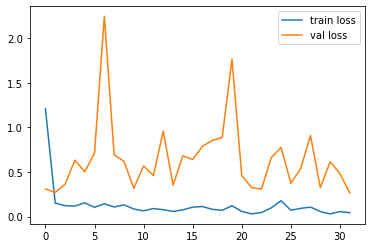

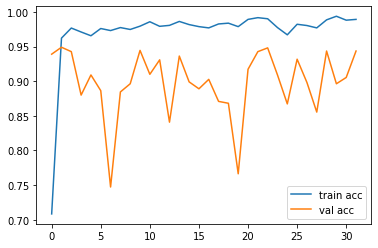

In [ ]:
# plot the loss curve
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy curve
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 5, 5, 2048)        42626560  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

# **Model Visualisation**

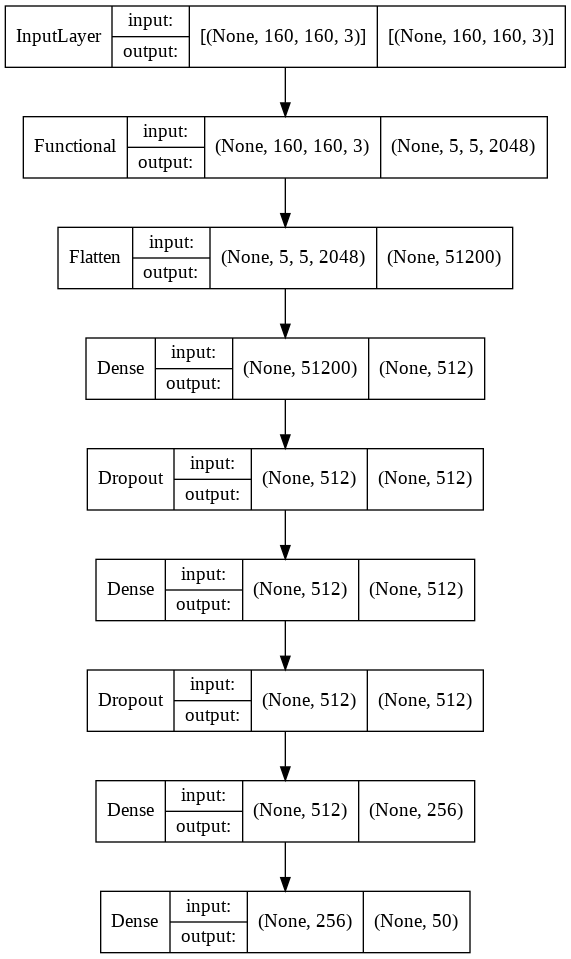

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_layer_names=False, show_shapes=True, to_file='model.png')

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
predict_x=model.predict(X_test) 
results=np.argmax(predict_x,axis=1)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = classes,
                     columns = classes
                    )

In [ ]:
final_cm = cm_df

In [ ]:
final_cm

,Wrightia religiosa,Wrightia,Melaleuca,Prunus salicina,Spondias mombin L,Cocos nucifera,Pterocarpus macrocarpus,Melia azedarach,Dalbergia oliveri,Prunnus,...,Casuarina equisetifolia,Tamarindus indica,Citrus grandis,Erythrina fusca,Senna siamea,Delonix regia,Syzygium nervosum,Veitchia merrilli,Nephelium lappaceum,Hevea brasiliensis
Wrightia religiosa,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wrightia,0,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Melaleuca,0,0,19,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
Prunus salicina,0,0,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spondias mombin L,0,0,0,0,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cocos nucifera,0,0,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pterocarpus macrocarpus,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Melia azedarach,0,0,0,0,1,0,0,16,0,0,...,0,0,0,0,0,0,0,0,0,0
Dalbergia oliveri,0,1,0,1,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,0
Prunnus,0,1,0,0,0,0,0,0,0,19,...,0,0,0,0,0,0,0,0,0,0


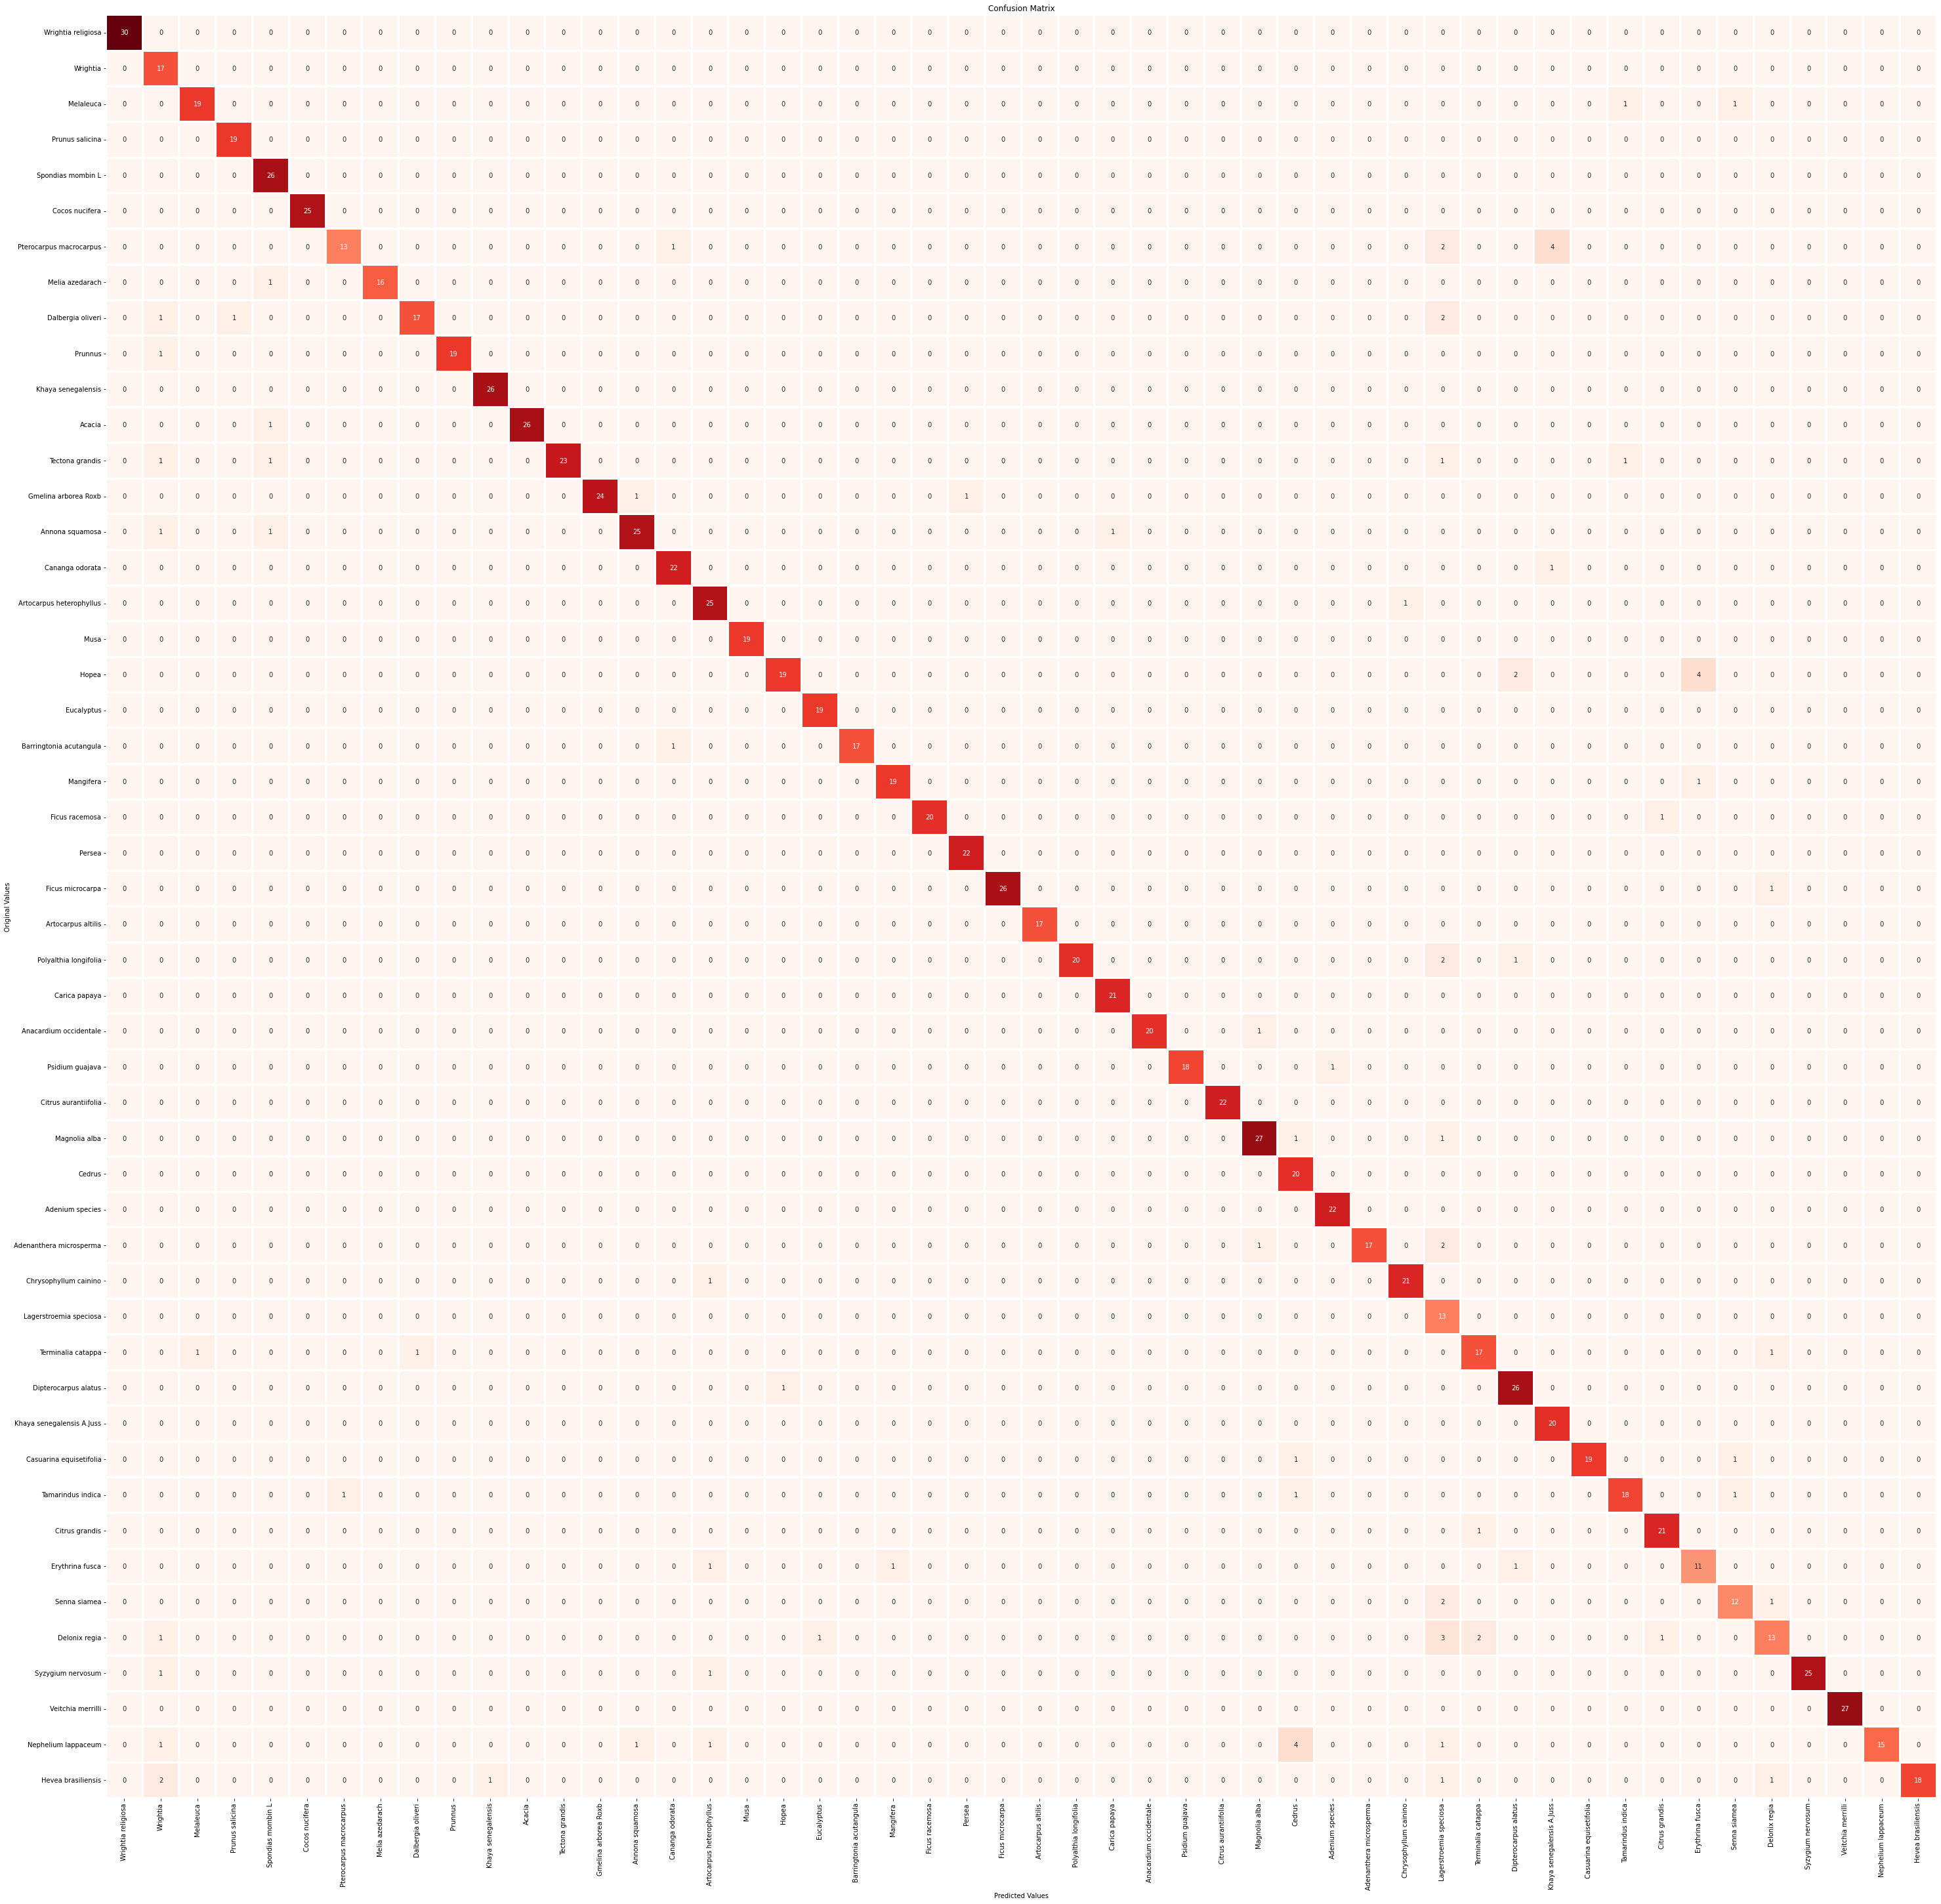

In [ ]:
plt.figure(figsize = (50,50))
sns.heatmap(final_cm, annot = True,cmap='Reds',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Original Values')
plt.xlabel('Predicted Values')
plt.savefig('Cm.png')
plt.show()

# **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.where(y_test == 1)[1], results, target_names=classes))

                           precision    recall  f1-score   support

       Wrightia religiosa       0.95      1.00      0.97        18
                 Wrightia       1.00      0.96      0.98        24
                Melaleuca       1.00      0.80      0.89        15
          Prunus salicina       1.00      0.95      0.98        22
        Spondias mombin L       0.90      1.00      0.95        19
           Cocos nucifera       0.96      1.00      0.98        26
  Pterocarpus macrocarpus       0.95      0.90      0.93        21
          Melia azedarach       1.00      1.00      1.00        19
        Dalbergia oliveri       0.85      1.00      0.92        23
                  Prunnus       1.00      0.94      0.97        18
       Khaya senegalensis       0.95      1.00      0.98        21
                   Acacia       0.94      0.94      0.94        18
          Tectona grandis       0.91      0.78      0.84        27
     Gmelina arborea Roxb       1.00      0.94      0.97     

# **Model Evaluation - Precision, Recall and F1-Score**

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision = precision_score(np.where(y_test == 1)[1], results, average='weighted')
print('Precision: ',precision*100)

Precision:  94.66460452988085


In [ ]:
recall = recall_score(np.where(y_test == 1)[1], results,average='weighted')
print('Recall: ',recall*100)

Recall:  94.36363636363636


In [ ]:
score = f1_score(np.where(y_test == 1)[1], results,average='weighted')
print('F-Measure: ',score*100)

F-Measure:  94.33378898588039
